In [14]:
source("/home/juan/Documentos/Rfunj/arranque_notebook.R")

In [15]:
#tema de graficación
library("ggplot2")
temajuan <- theme(
  legend.position = c(0.14, 0.80),
  legend.background = element_blank(),
  legend.title = element_text(size = 22),
  legend.box = "horizontal",
  legend.direction = "vertical",
  plot.title = element_text(size = 18),
  #legend.key.height = unit(0.1,"snpc"),
  legend.key.width  = unit(0.125,"snpc"),
  #legend.box.spacing = unit(0.1,"snpc"),
  legend.key = element_blank(),
  legend.spacing.x = unit(10, "pt"),
  legend.text = element_text(size = 24, margin = margin(t = 0, r= 5,b = 0, l = 3, unit = "pt")),
  axis.line = element_line(size = 0.5, lineend = "square"),
  axis.title = element_text(size = 24),
  axis.text.x = element_text(size = 18, colour = "black", angle = 0,  vjust = 1),
  axis.text.y = element_text(size = 18, colour = "black"),
  axis.ticks = element_line(size = 1, colour = "black"),
  panel.border = element_rect(size = 1, fill = NA)
)  

In [16]:
dirDatos <- "/home/juan/Documentos/Docencia/fexpi/2024/DatosLabo3/"
setwd(dirDatos)

In [17]:
dirGraf <- "/home/juan/Documentos/Docencia/fexpi/2024/DatosLabo3/Graf/"
setwd(dirGraf)
setwd(dirDatos)

# Análisis de Datos Laboratorio 3



**Encontrar la dimensión fractal que vincula masas con radios en esferas de papel.** Simplemente voy a hacer una gráfica m vs r (al revés de la que hacen uds.):

    
1. Voy a hacer un ajuste por persona de $log(m) \propto log(r)$ y voy a encontrar la dimensión $Dmr$ junto con su incerteza, $smr$.

1.  Un ajuste de $log(r) \propto log(m)$ y voy a encontrar $Drm$, junto con su incerteza, $srm$.

Voy a hacer una tabla para cada persona (así pueden comparar con sus propios resultados).

Buena suerte!

In [18]:
d <- read.csv(file = "Esferas.csv", header = T, sep = ",")

In [19]:
colnames(d) <- c("m", "d", "Nombre"); #masa en g, diámetros en cm
head(d, 2)
d$d[d$Nombre == "Jeronimo Vega"] <- 10 * d$d[d$Nombre == "Jeronimo Vega"]

,m,d,Nombre
,<dbl>,<dbl>,<fct>
1,0.582,1.6,Nahuel
2,0.582,1.7,Nahuel


In [20]:
#definimos radios
d$r <- d$d /2;

#definimos volumen 
d$V <- (4*pi/3)*d$r^3; #cm^3

#definimos densidad volumétrica
d$rho <- d$m / d$V; #g/cm^3
head(d, 3)

,m,d,Nombre,r,V,rho
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,0.582,1.6,Nahuel,0.80,2.144661,0.2713716
2,0.582,1.7,Nahuel,0.85,2.572441,0.2262443
3,0.582,1.9,Nahuel,0.95,3.591364,0.1620554


In [21]:
#ploteamos modelo
gmr <- ggplot() + 
geom_point(data = d, aes(x = r, y = m,colour = Nombre), size = 3) + 
geom_smooth(data = d, aes(x = r, y = m, colour = Nombre), method = "lm",
            formula = "y ~ x", alpha = 0.1) +
geom_smooth(data = d, aes(x = r, y = m, lty = "Todos"), colour = "Black", lwd = 3, method = "lm",
            formula = "y ~ x") +
scale_linetype_manual(values = c("Todos" = 1), name = NULL) + 
#geom_line(data = modelo_d3, aes(x = r, y = m_min, colour = "3d")) + 
#scale_colour_manual(values = c("Datos" = "Black", "3d" = "Black"),
#                    labels = list(TeX("Datos Experimentales"), TeX("$m \\propto \\frac{4 \\pi}{3}r^3$") ) ) + 
xlab("r (cm) [escala log]") + ylab("m (g) [escala log]") + ggtitle("Nombres y unidades en los Ejes") + temajuan + 
scale_y_continuous(trans = "log10", limits = c(0.4,10),breaks = c(0.5,seq(1,10,1) ), labels = c(0.5,seq(1,10,1) ) ) + 
scale_x_continuous(trans = "log10", )  + 
theme(legend.position = c(0.15,0.75), legend.box = "vertical")

Warning message:
“Removed 11 rows containing missing values (geom_smooth).”
Warning message:
“Removed 19 rows containing missing values (geom_smooth).”


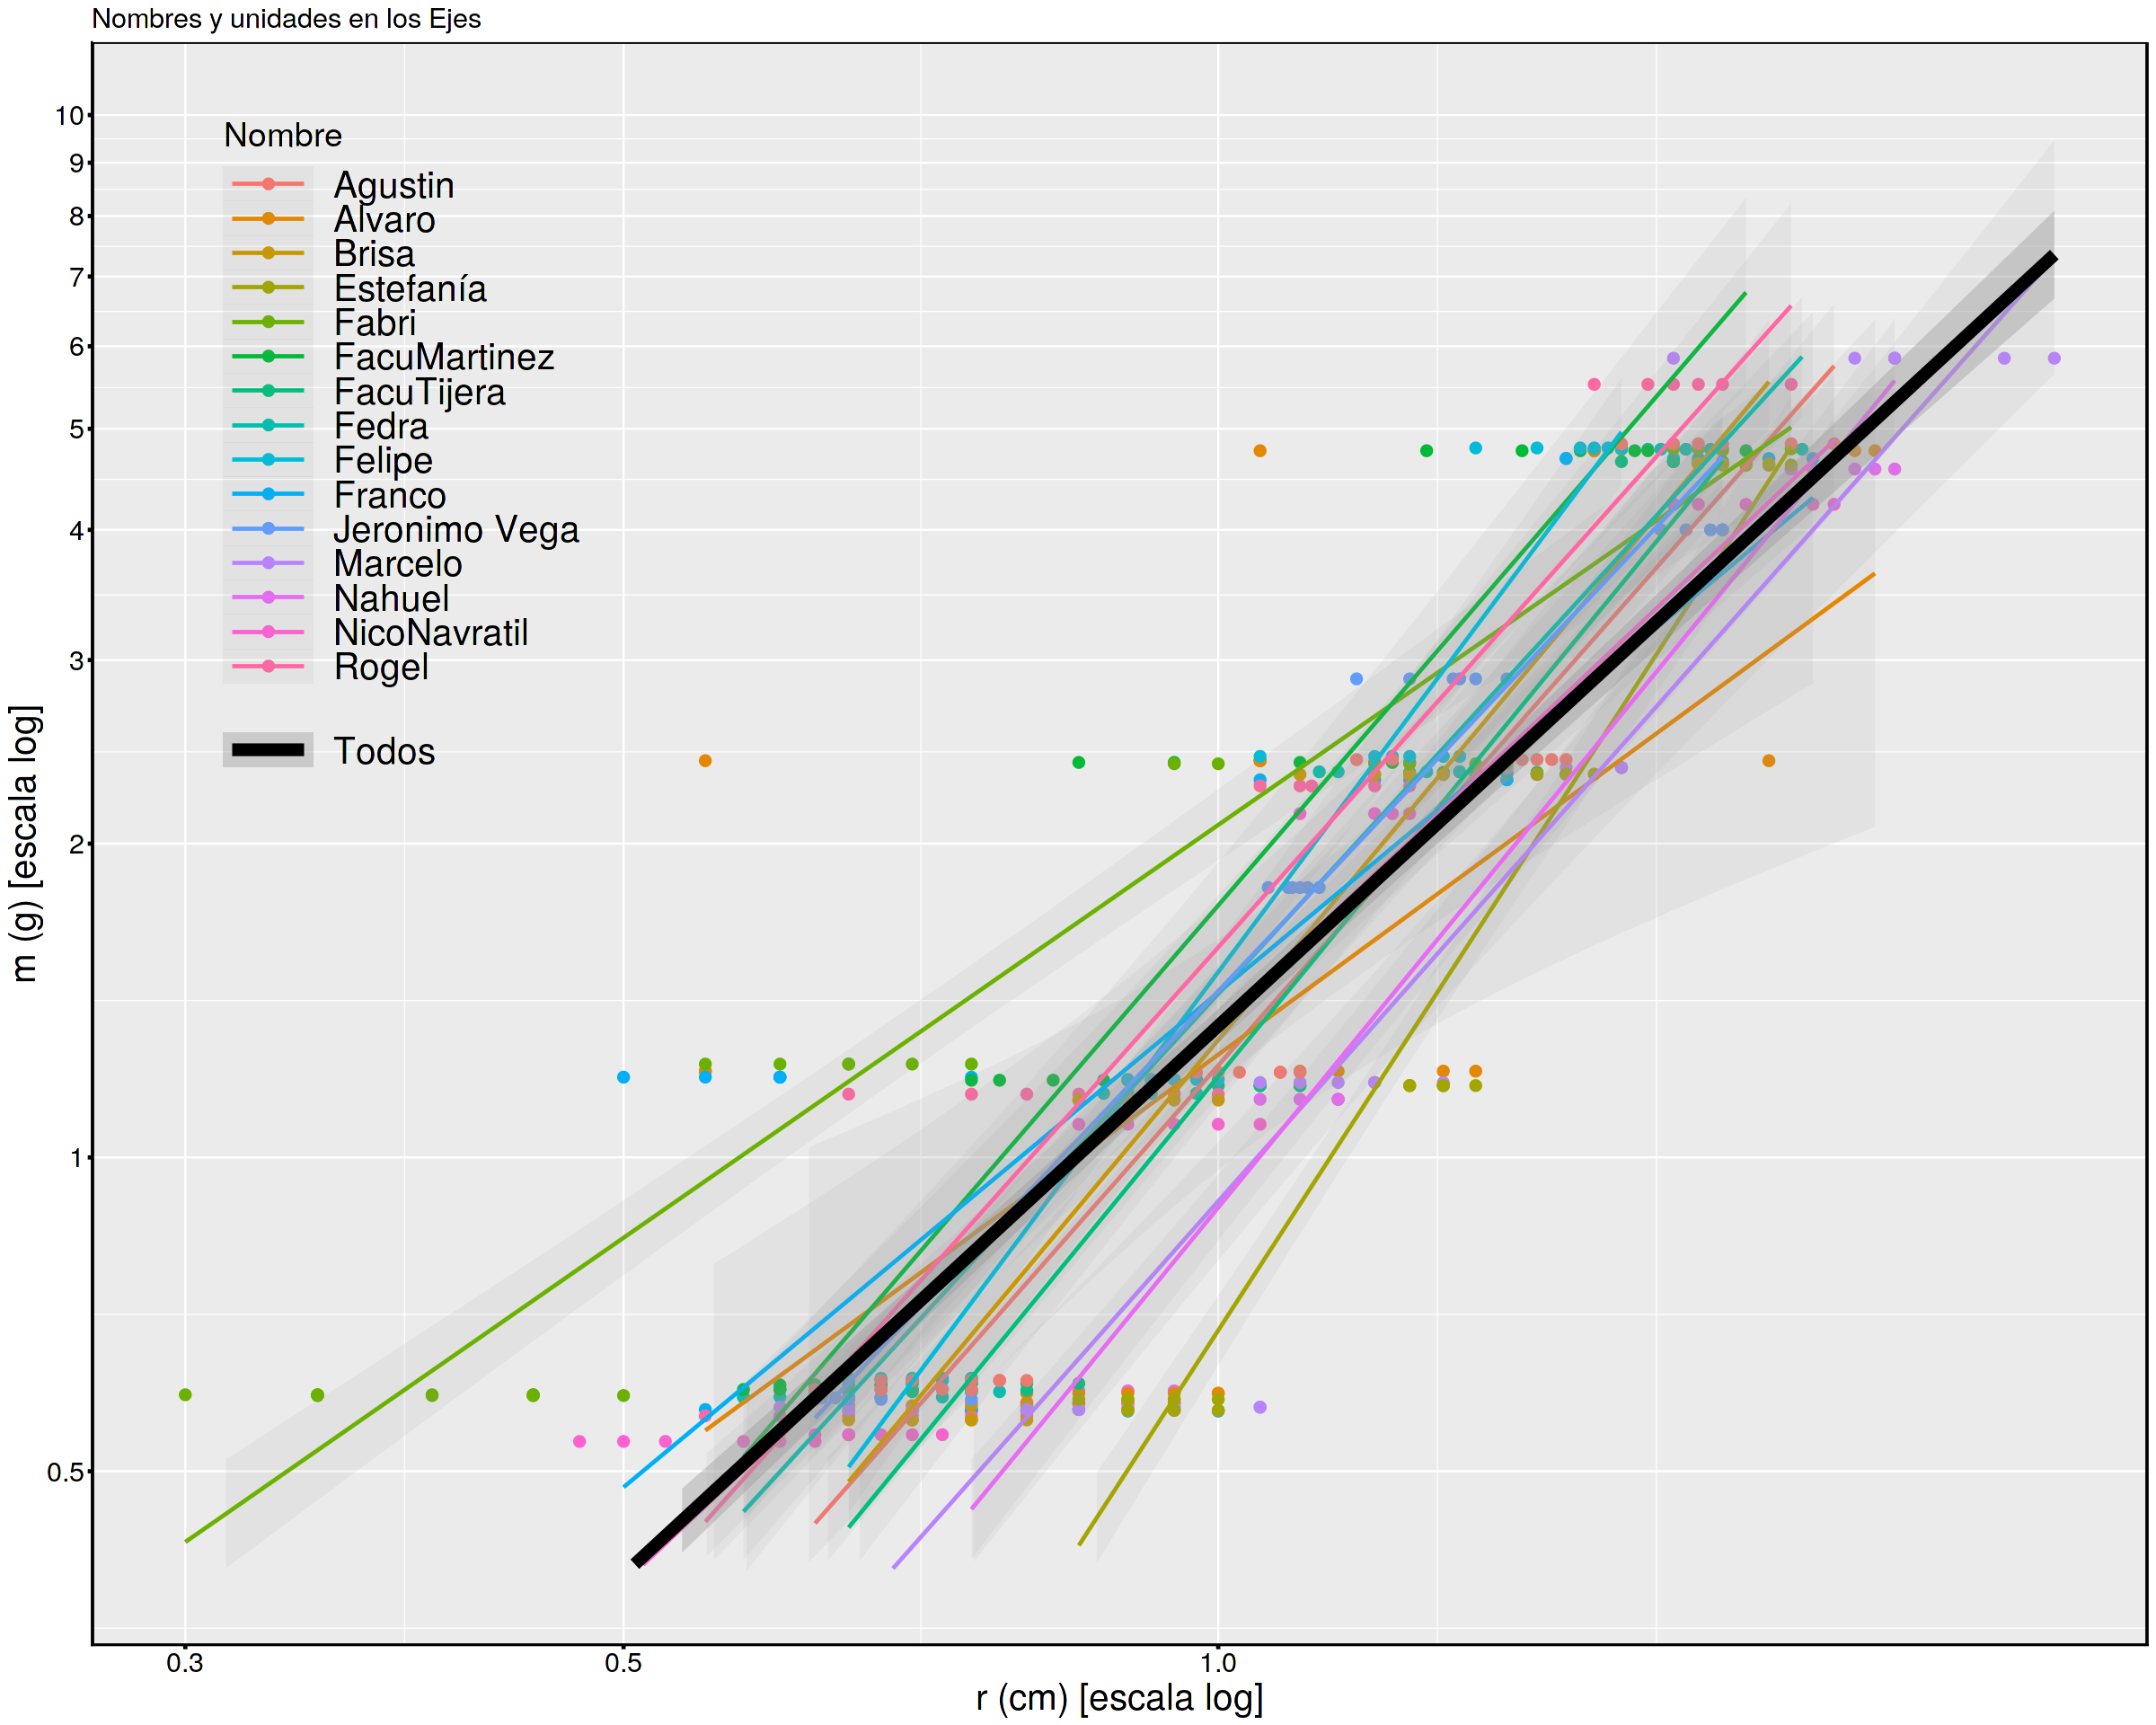

In [22]:
fig(20,16)
show(gmr)

In [24]:
Dmr  <- vector(mode = "numeric")
smr <- vector(mode = "numeric")
Drm  <- vector(mode = "numeric")
srm <- vector(mode = "numeric")

Nombre <- vector(mode = "character")

for(i in unique(d$Nombre)){
di <- d[d$Nombre == i, ]
    
a <- summary.lm(lm(log10(di$m) ~ log10(di$r)))
Dmr <- c(Dmr, a$coefficients[2,1])
smr <- c(smr, a$coefficients[2,2])    

a <- summary.lm(lm(log10(di$r) ~ log10(di$m)))
Drm <- c(Drm, 1/a$coefficients[2,1])
srm <- c(srm,  (1/a$coefficients[2,1]^2) * a$coefficients[2,2])    

    
Nombre <- c(Nombre, i) 
}

resumen <- data.frame(Nombre = Nombre, Dmr = Dmr, Drm = Drm , smr = smr, srm = srm)
head(resumen, 16)

,Nombre,Dmr,Drm,smr,srm
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nahuel,2.316690,2.424712,0.09453912,0.09894727
2,Fedra,2.067467,2.154604,0.08021230,0.08359297
3,NicoNavratil,1.788605,1.887990,0.07967799,0.08410535
4,Alvaro,1.388766,3.817464,0.34707415,0.95404371
5,Franco,1.576720,2.575121,0.23711045,0.38725198
6,FacuMartinez,2.200929,2.406917,0.12724600,0.13915508
7,FacuTijera,2.313289,2.403645,0.08640022,0.08977498
8,Rogel,2.122236,2.346105,0.14695448,0.16245635
9,Brisa,2.265220,2.369125,0.09168397,0.09588947


In [25]:
srm[15] 
a$coefficients[2,2] / a$coefficients[2,1]^2

[1] 0.09288739

[1] 0.09288739

Las columnas son:

* Nombre: el nombre de cada persona del curso.

* Dmr: la pendiente de la regresión lineal con la masa m en el eje vertical y el radio r en el horizontal, con ambos ejes con log10 (que identificamos con la dimensión fractal).

* Drm: 1 / la pendiente de la regresión lineal con el radio r el eje vertical y la masa m en el horizontal, obvio que ambos ejes con log10.

* smr: la desviación estándar de la pendiente

* srm: la desviación estándar de Drm.

***Importante***: Ver que en general dar vueltas los ajustes no hace lo que ingenuamente resultaría obvio:

$$
Dmr \neq Drm
$$

Esto es porque los ajustes tienen *detalles*.

Álvaro, que le pone poca gana, debe tener varios outliers que le ponen las pendientes locas. Franco tb. Revisen los datos. Si pueden, hacen bolas de nuevo y las miden con la regla, pero no es indispensable.

In [26]:
a <- summary.lm(lm(log(d$d/2) ~ log(d$m) ))
a$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.1214008,0.01026396,-11.82787,3.108524e-28
log(d$m),0.4314573,0.01171250,36.83735,8.257675e-137


# One by one

In [45]:
d[d$Nombre == "Franco", ]

,m,d,Nombre,r,V,rho
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
121,4.683,3.5,Franco,1.75,22.4492975,0.2086034
122,4.683,3.0,Franco,1.50,14.1371669,0.3312545
123,4.683,3.4,Franco,1.70,20.5795263,0.2275563
124,4.683,4.0,Franco,2.00,33.5103216,0.1397480
125,4.683,3.8,Franco,1.90,28.7309120,0.1629952
126,4.683,3.0,Franco,1.50,14.1371669,0.3312545
127,2.303,2.4,Franco,1.20,7.2382295,0.3181717
128,2.303,2.5,Franco,1.25,8.1812309,0.2814980
129,2.303,2.8,Franco,1.40,11.4940403,0.2003647


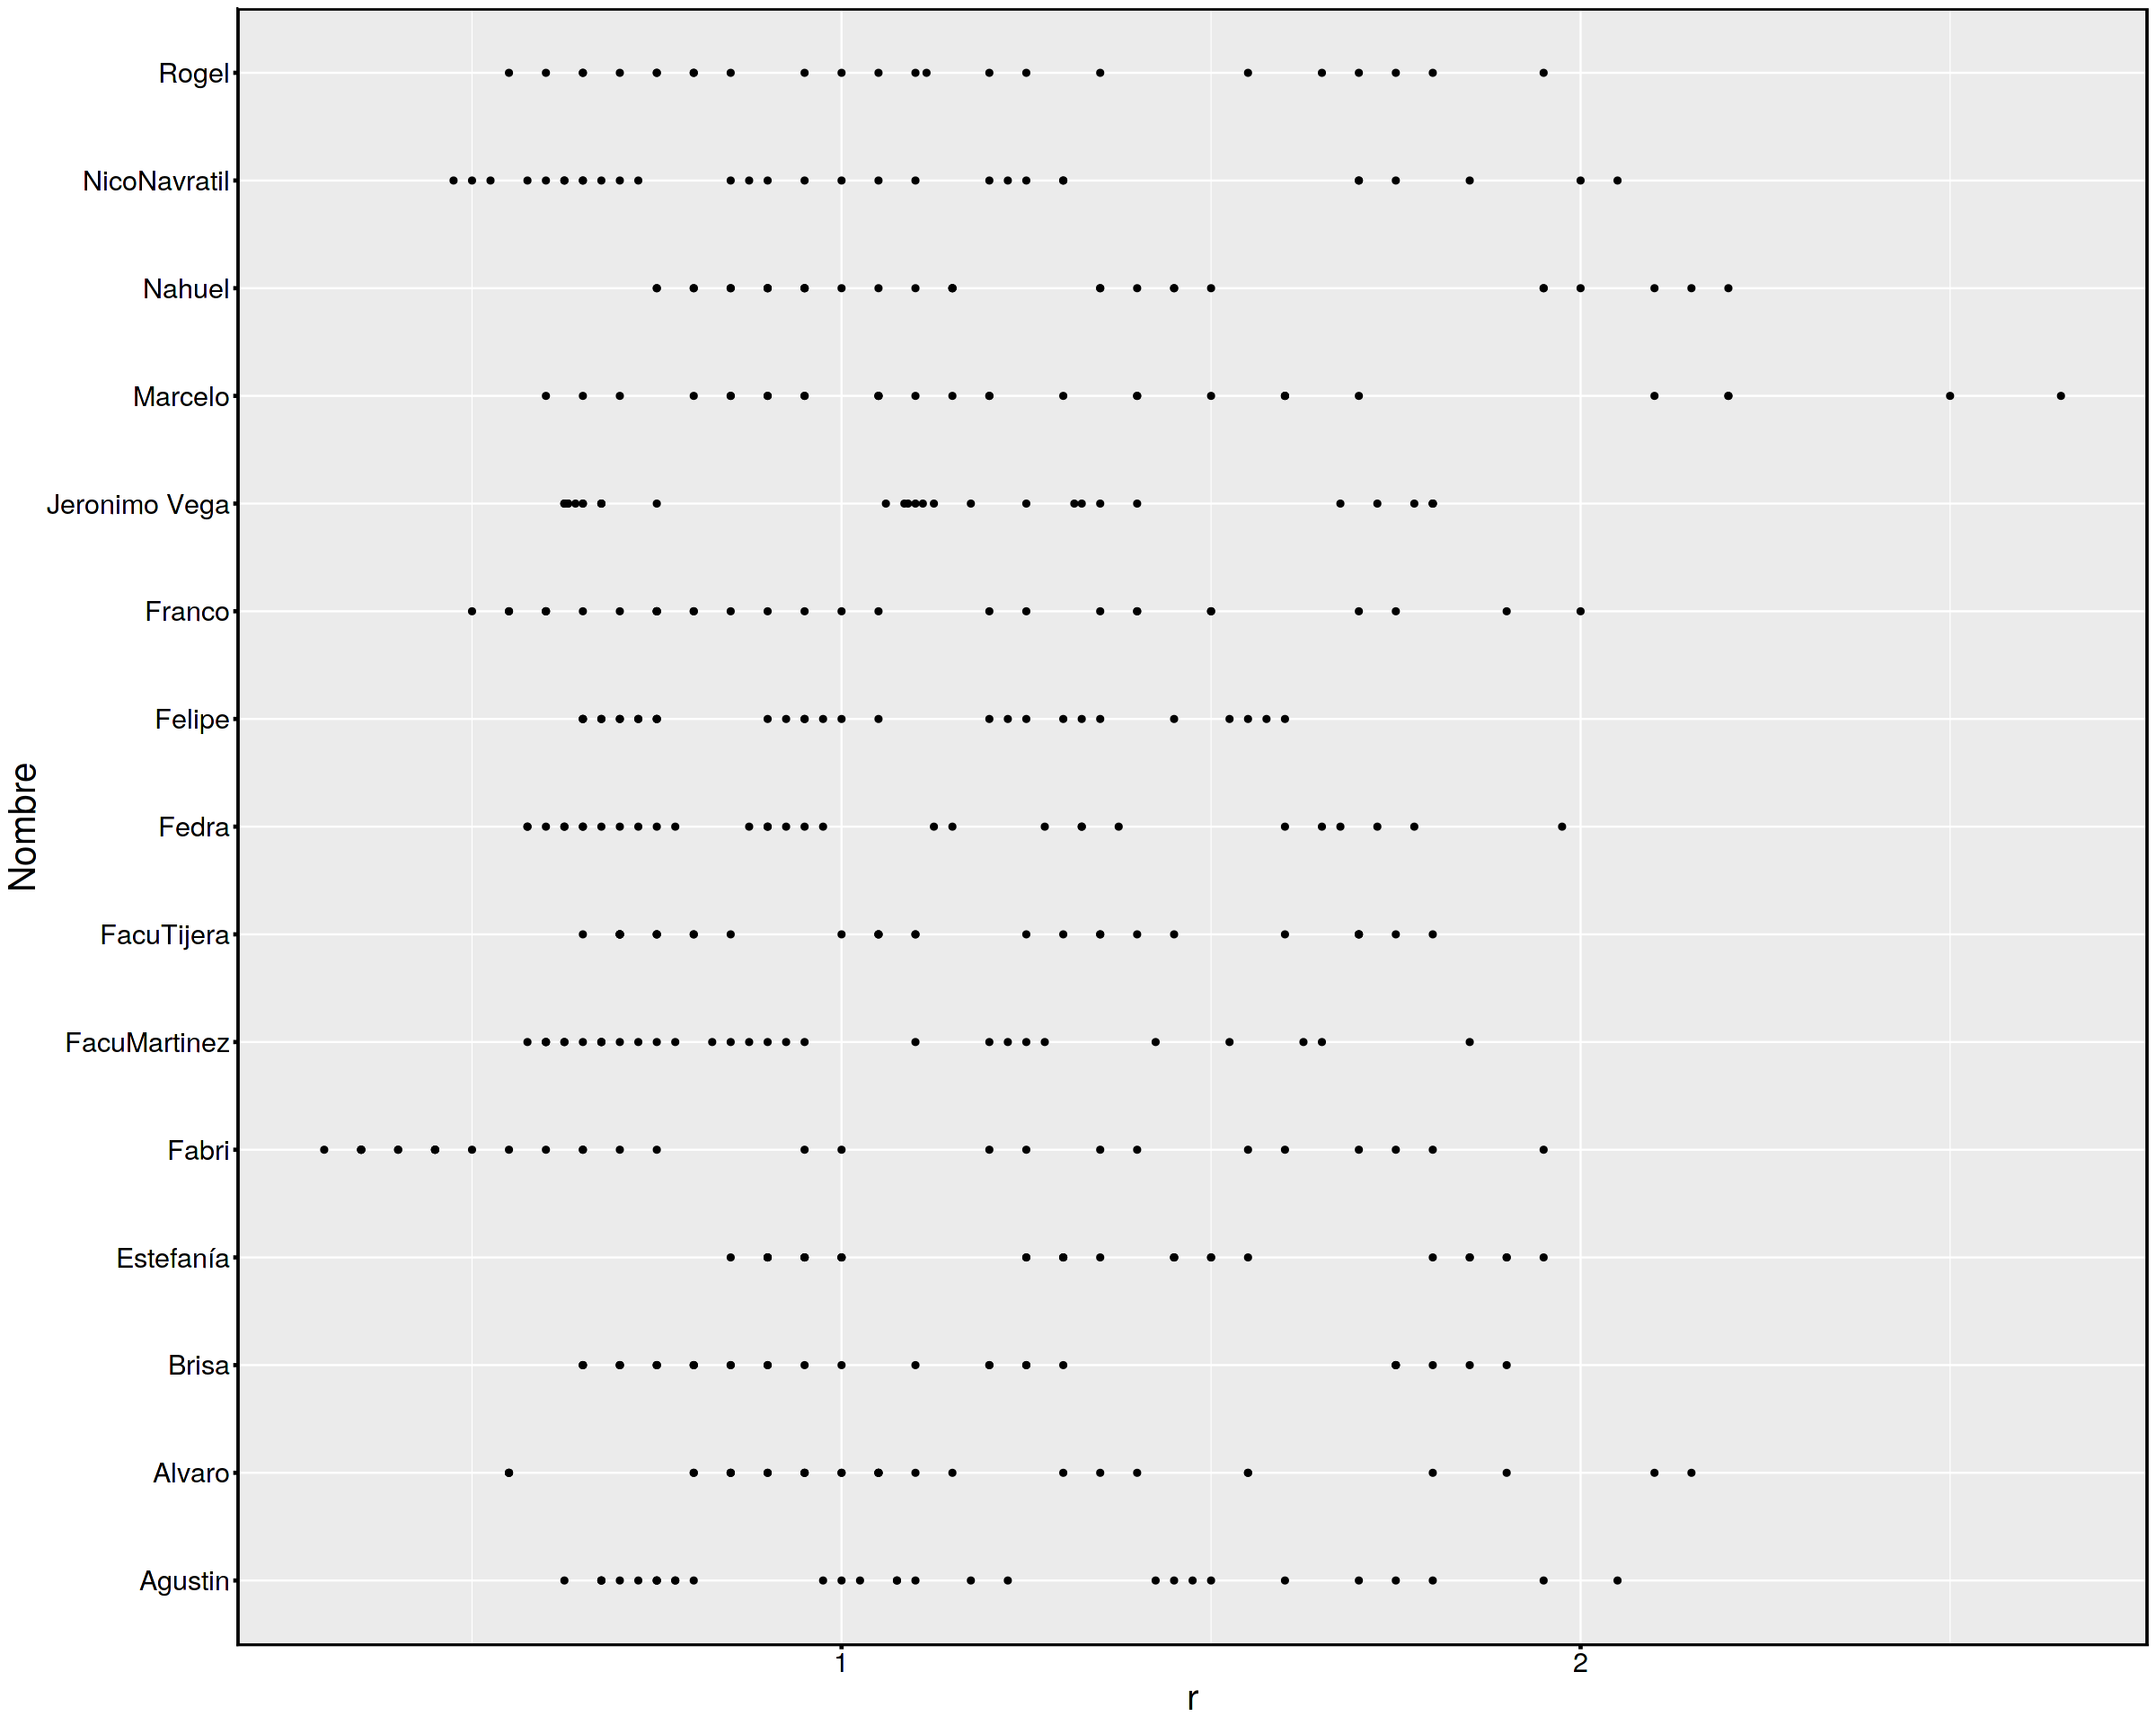

In [53]:
ggplot(data = d) + 
geom_point(aes(y = Nombre, x = r)) +
temajuan + 
theme(axis.text.y  = element_text()) 


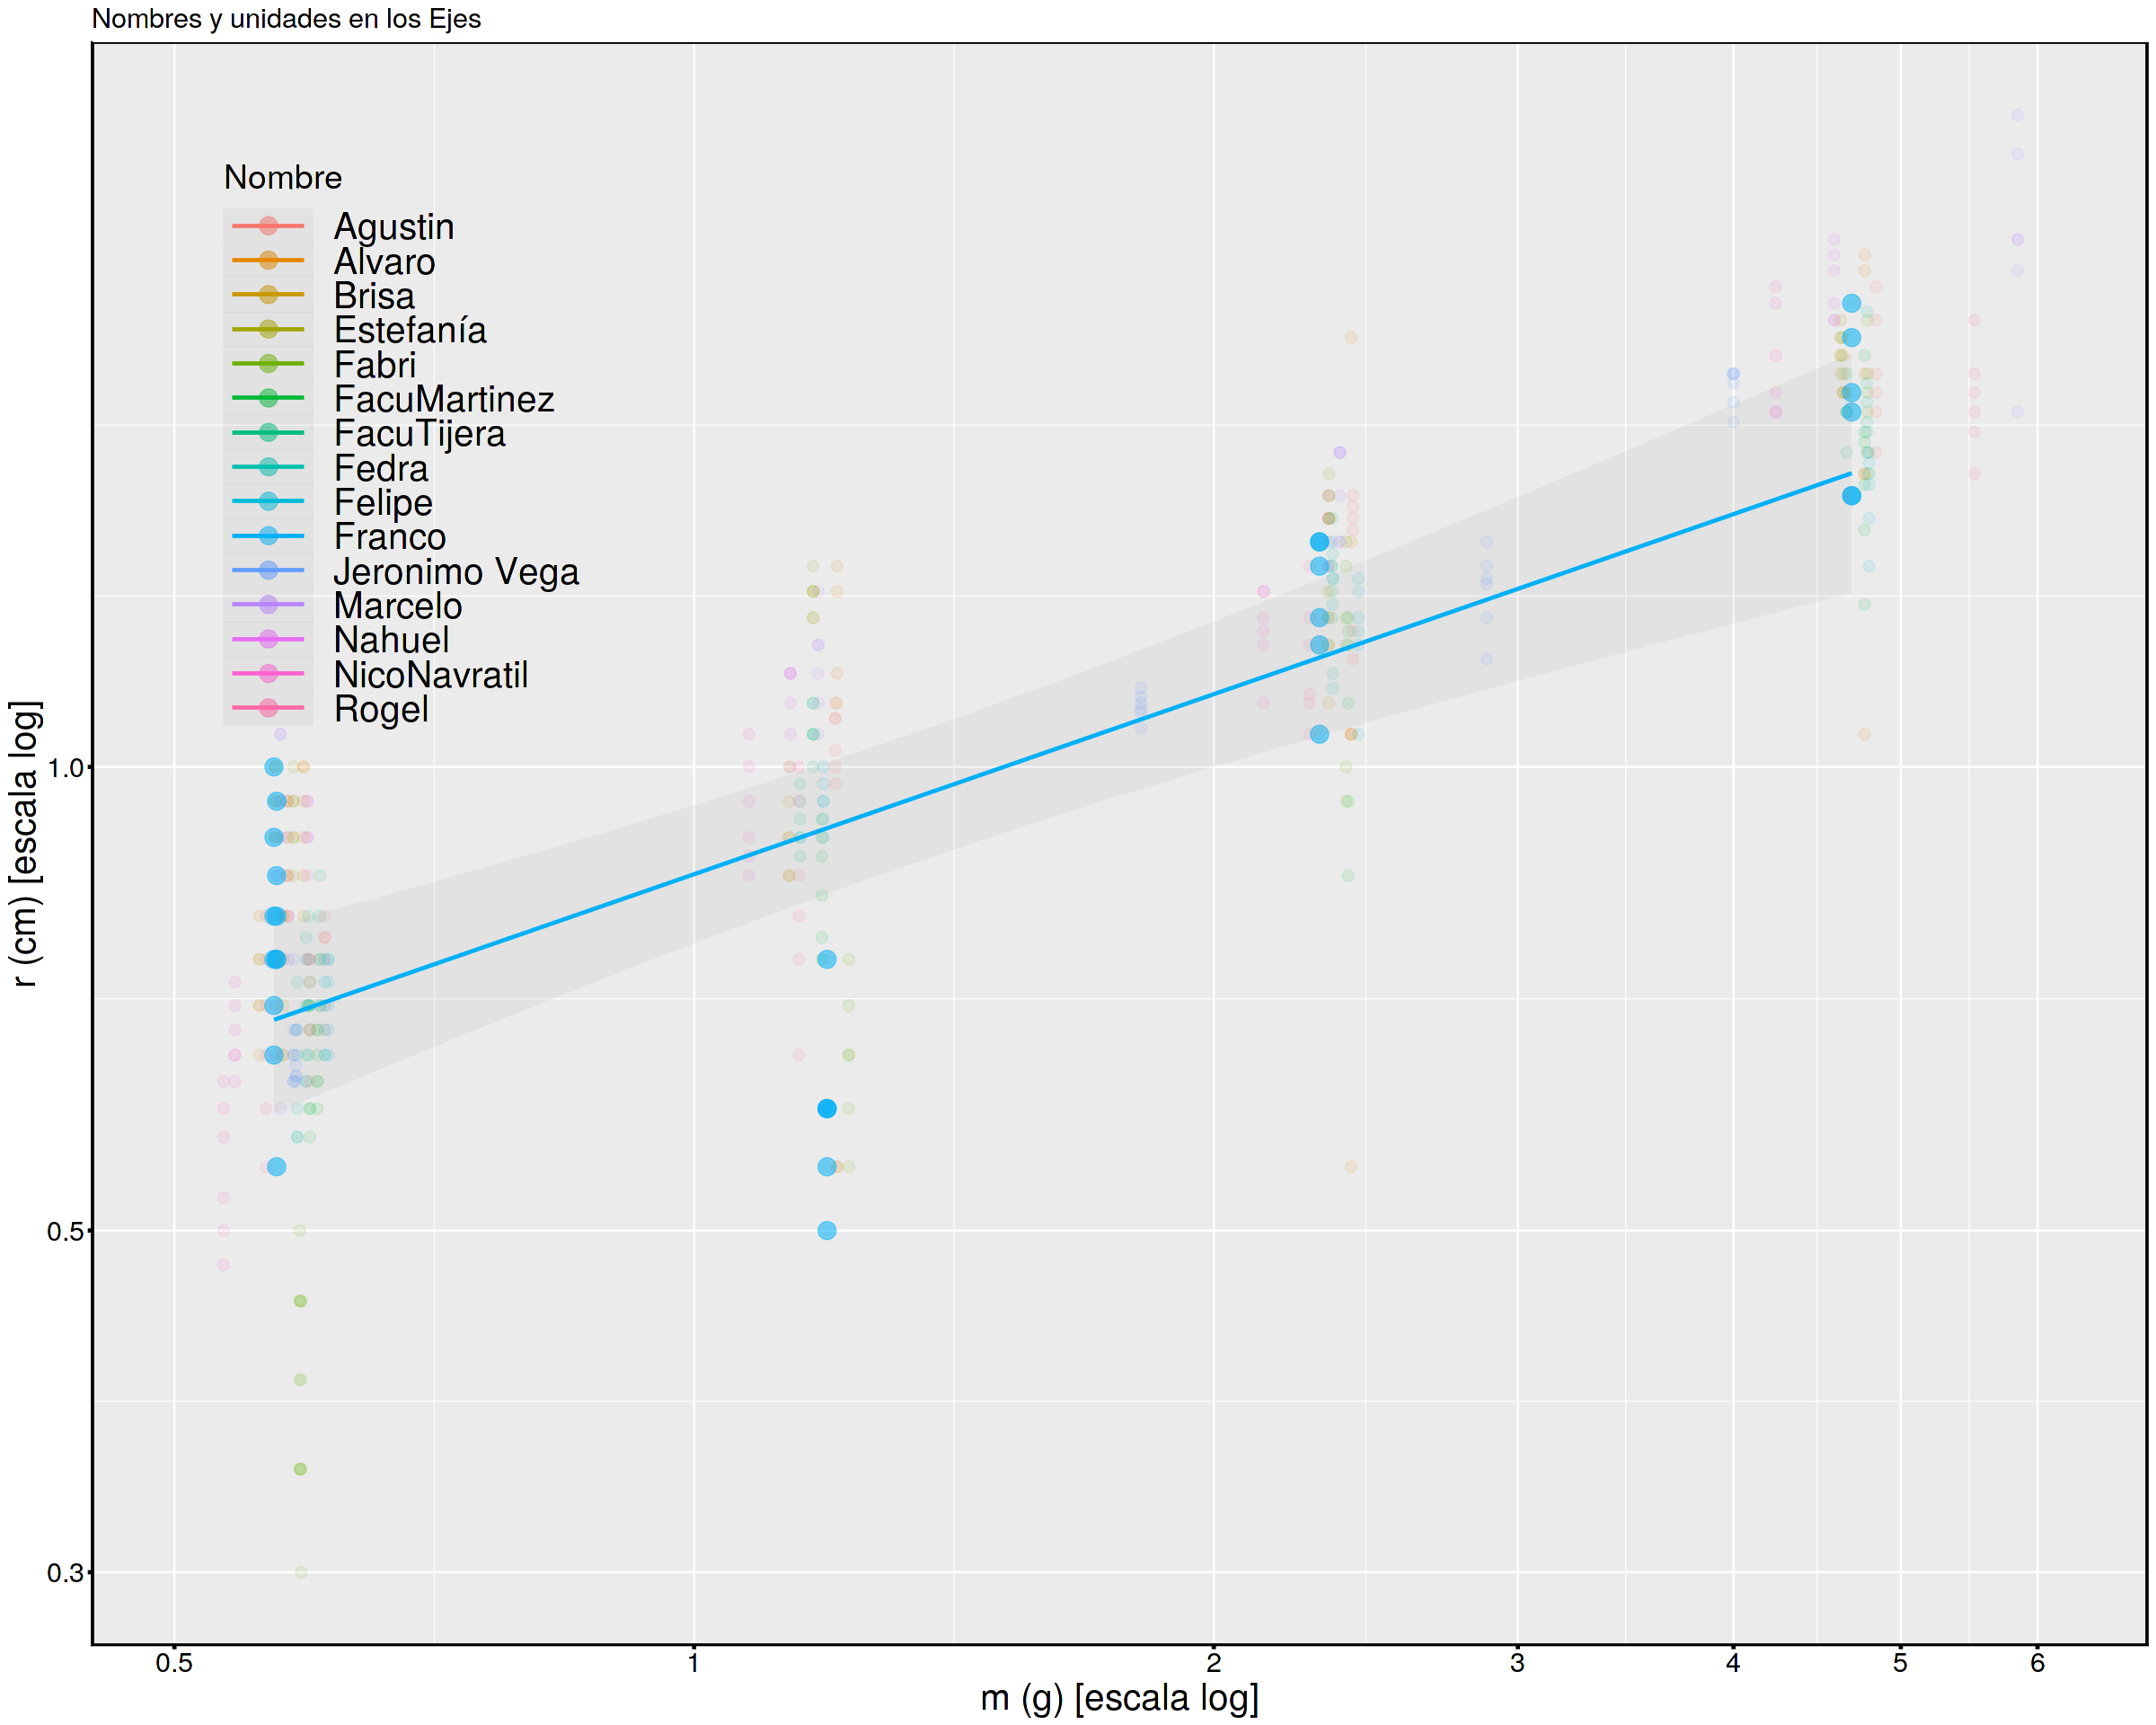

In [54]:
ggplot() + 
geom_point(data = d, aes(x = m, y = r,colour = Nombre), size = 3, alpha = 0.1) +
geom_point(data = d[d$Nombre == "Franco", ], aes(x = m, y = r,colour = Nombre), size = 5, alpha = 0.5) +
geom_smooth(data = d[d$Nombre == "Franco", ], aes(x = m, y = r, colour = Nombre), method = "lm",
            formula = "y ~ x", alpha = 0.1) +
#geom_point(data = d[d$Nombre == "Estefanía", ], aes(x = m, y = r,colour = Nombre), size = 3, alpha = 1) +
#geom_smooth(data = d[d$Nombre == "Estefanía", ], aes(x = m, y = r, colour = Nombre), method = "lm",
#            formula = "y ~ x", alpha = 0.1) +
#geom_abline(aes(slope = 1/3, intercept = 0), lwd = 2, colour = "DeepSkyBlue2") +
#geom_abline(aes(slope = 1/2, intercept = 0), lwd = 2, colour = "DeepSkyBlue4") +
#geom_abline(aes(slope = 1/2.5, intercept = 0), lwd = 2, colour = "DeepSkyBlue3") +



#geom_line(data = modelo_d3, aes(x = r, y = m_min, colour = "3d")) + 
#scale_colour_manual(values = c("Datos" = "Black", "3d" = "Black"),
#                    labels = list(TeX("Datos Experimentales"), TeX("$m \\propto \\frac{4 \\pi}{3}r^3$") ) ) + 
ylab("r (cm) [escala log]") + xlab("m (g) [escala log]") + ggtitle("Nombres y unidades en los Ejes") + temajuan + 
scale_x_continuous(trans = "log10", limits = c(min(d$m)*0.95,max(d$m)*1.05),breaks = c(0.5,seq(1,10,1) ), labels = c(0.5,seq(1,10,1) ) ) + 
scale_y_continuous(trans = "log10" )  + 
theme(legend.position = c(0.15,0.75), legend.box = "vertical")

Warning message:
“Removed 318 rows containing missing values (geom_point).”


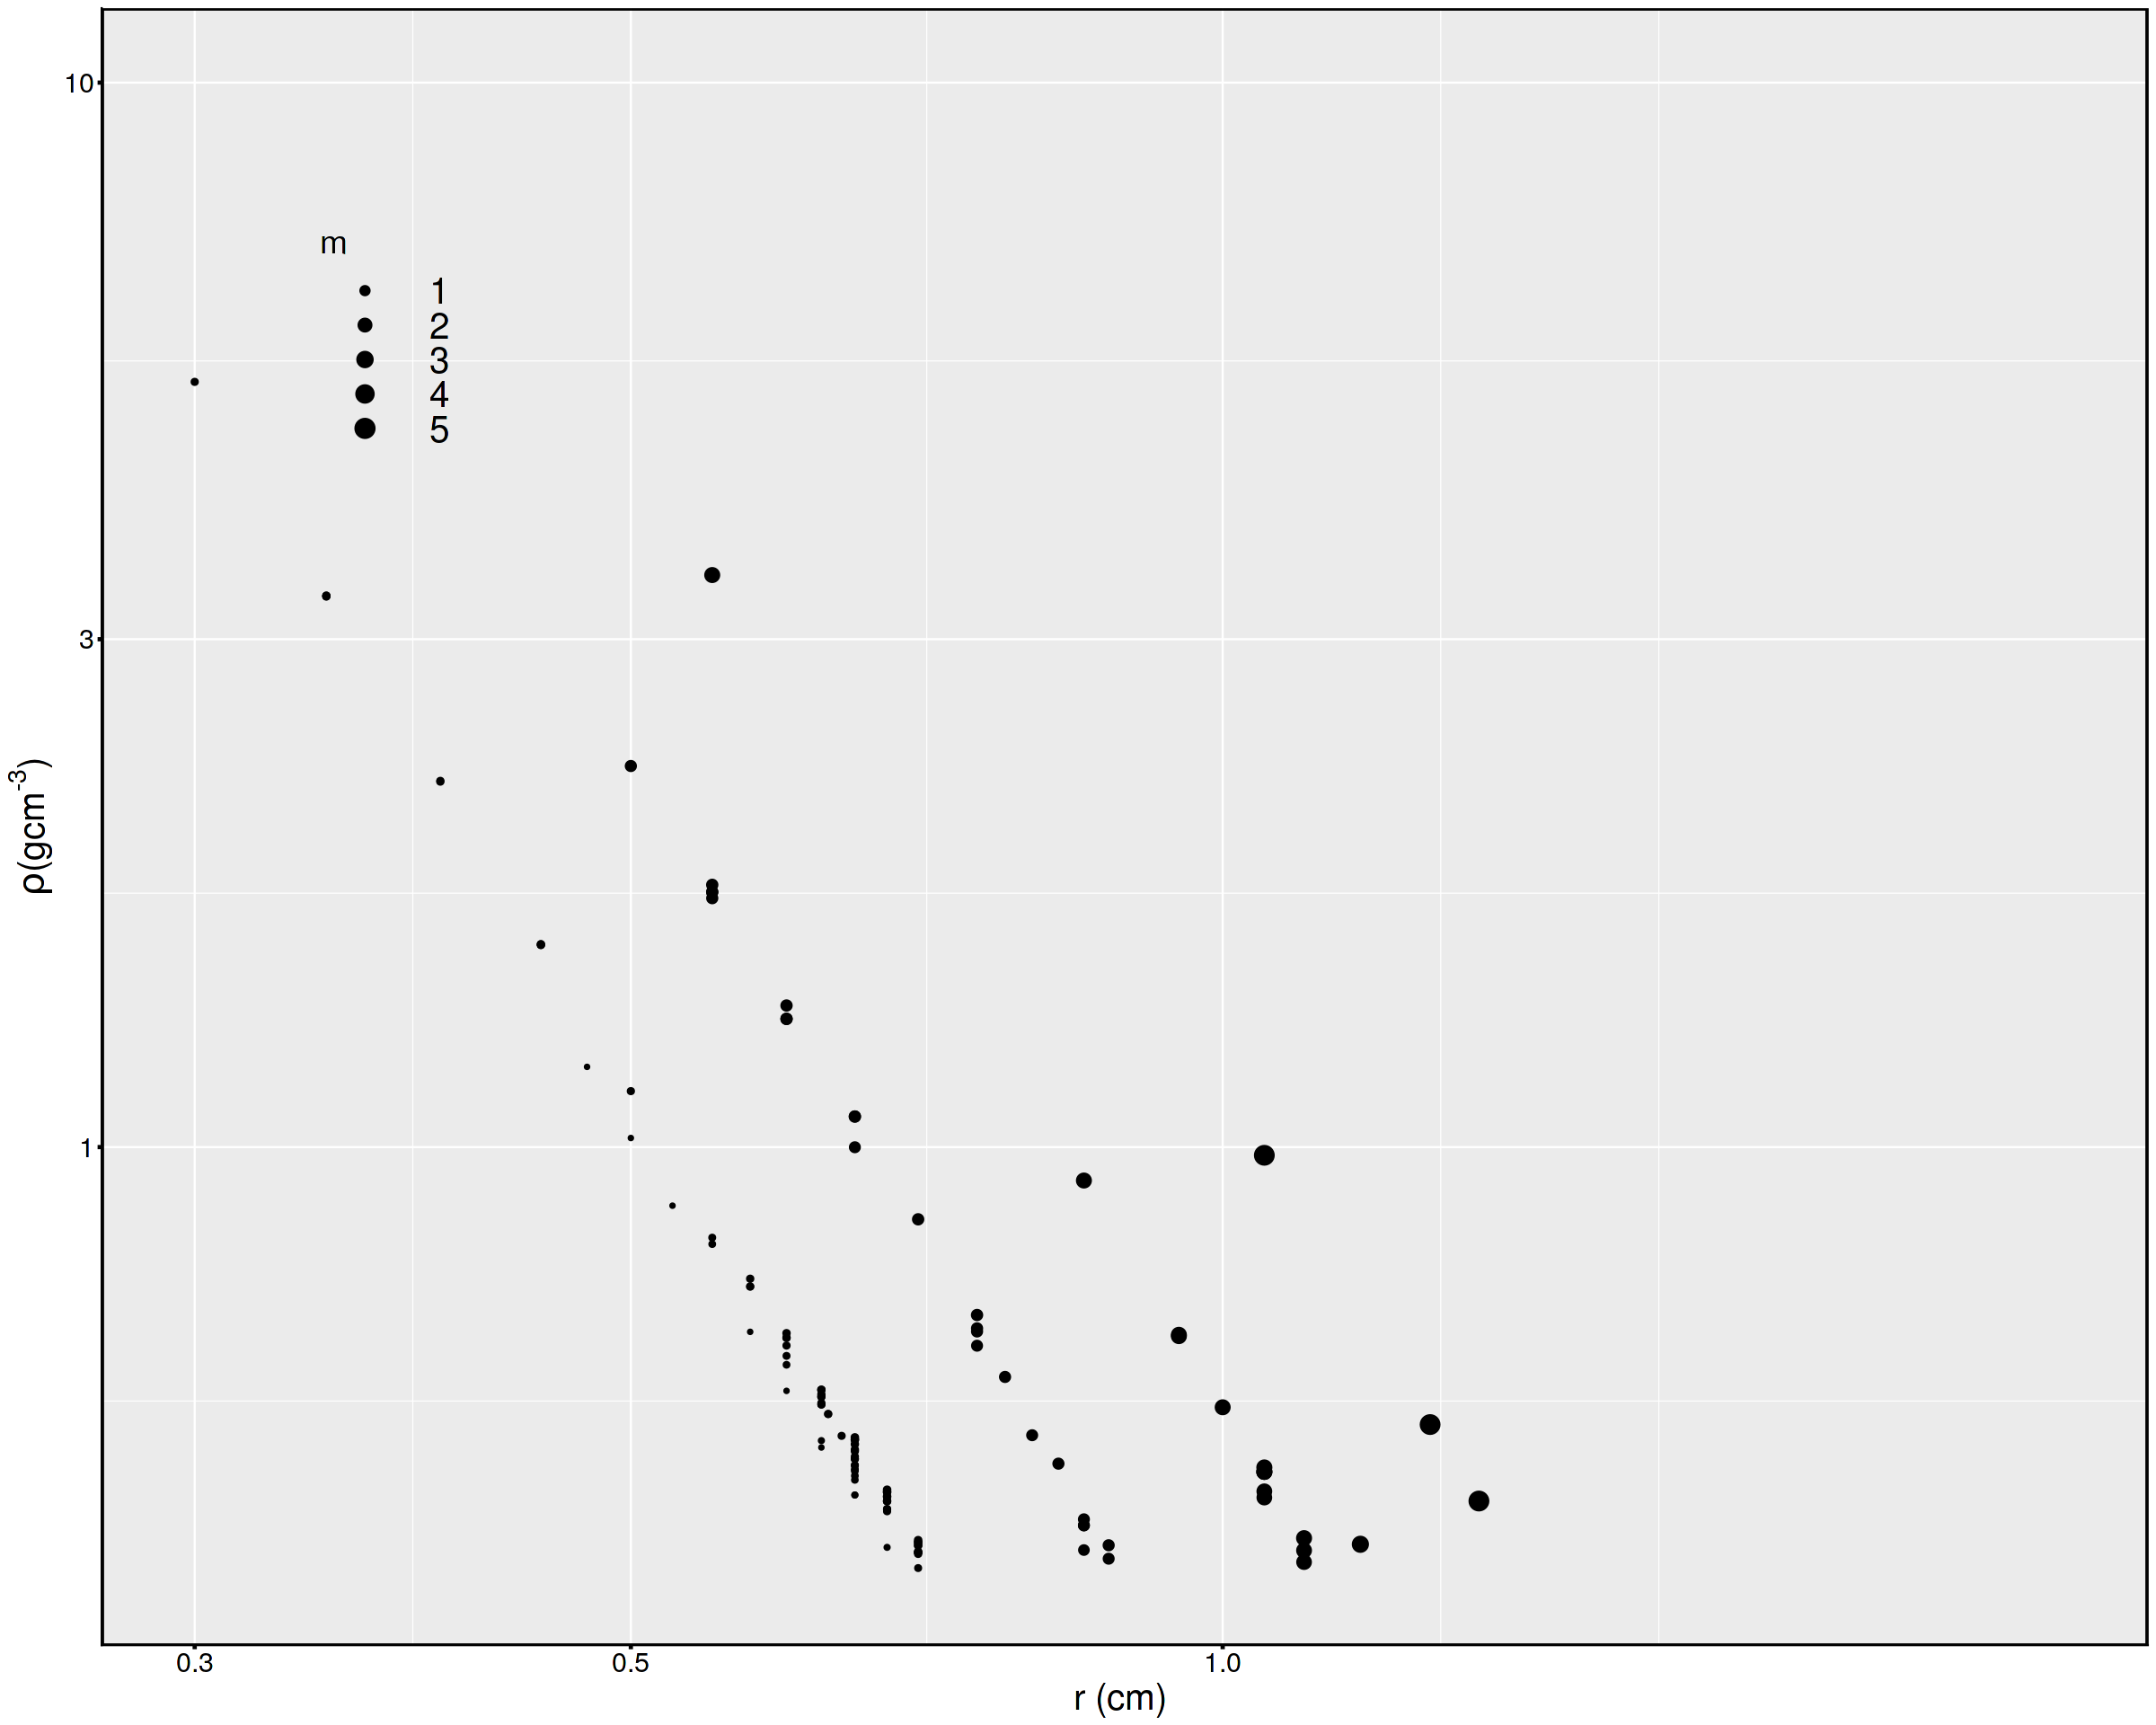

In [41]:
ggplot() + 
geom_point(data = d, aes(x = r, y = rho, size = m)) + 
xlab("r (cm) ") + ylab(TeX("$\\rho (g cm^{-3})$")) +
                                   temajuan + 
                                   
scale_y_continuous(trans = "log10", limits = c(0.4,10)) +
scale_x_continuous(trans = "log10") 
           